In [10]:
import pandas as pd

# Load the dataset
dataset_1 = pd.read_csv('/content/RS_Session_263_AU_105_C.csv')

# Clean the data by removing the 'Total' row and converting the column to numeric
dataset_1 = dataset_1[dataset_1['Wheeler Type'] != 'Total']
dataset_1['Total No. of Vehicle'] = pd.to_numeric(dataset_1['Total No. of Vehicle'], errors='coerce')

# Display the cleaned dataset
dataset_1.head()



,Sl. No.,Wheeler Type,Total No. of Vehicle
0,1,2 wheeler,1185829
1,2,3 wheeler,138639
2,3,4 wheeler,16991


**Clustering & Segment Extraction**

For segmentation, we'll assume we have data on customer demographics, vehicle preferences, and behavior. Here's how to perform clustering with K-Means:

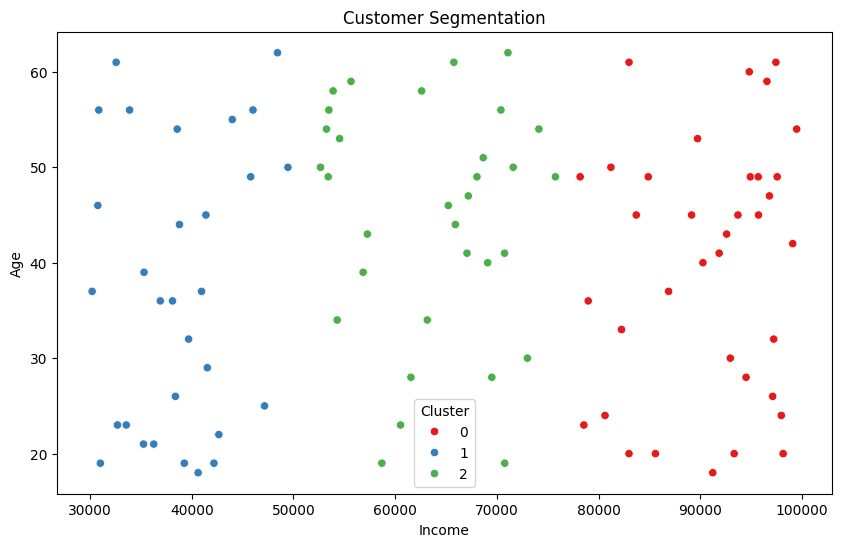

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Example data for clustering (you would replace this with actual demographic/behavioral data)
# Assuming we have columns like age, income, vehicle preference, etc.
# For the sake of this example, we'll use random data

import numpy as np
# Simulating random data for demonstration
np.random.seed(42)
data = {
    'Income': np.random.randint(30000, 100000, size=100),  # Random income between 30k to 1L
    'Age': np.random.randint(18, 65, size=100),  # Random age between 18 and 65
    'Vehicle Preference': np.random.choice(['2-wheeler', '3-wheeler', '4-wheeler'], size=100)  # Random choice
}

df = pd.DataFrame(data)

# Convert categorical 'Vehicle Preference' to numeric for clustering
df['Vehicle Preference'] = df['Vehicle Preference'].map({'2-wheeler': 0, '3-wheeler': 1, '4-wheeler': 2})

# Perform K-Means clustering to segment the data
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Income', 'Age', 'Vehicle Preference']])

# Visualize the clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Age', hue='Cluster', palette='Set1')
plt.title('Customer Segmentation')
plt.show()


**Market Location Analysis**

We'll analyze cities based on pollution, population density, and government EV incentives. Here's a simplified approach assuming we have this data (we'll need real-world data for this step):

In [12]:
# Simulating city data with hypothetical values (replace this with actual data)
city_data = {
    'City': ['Delhi', 'Bengaluru', 'Mumbai', 'Pune', 'Chennai'],
    'Pollution Level': [300, 150, 200, 100, 120],  # Higher values = worse pollution
    'Population Density': [11000, 8000, 20000, 5000, 6000],  # People per square km
    'EV Infrastructure': [60, 45, 50, 40, 30]  # Number of EV charging stations per 1000 people
}

city_df = pd.DataFrame(city_data)

# Calculate the suitability score based on these factors
city_df['Suitability Score'] = (city_df['Pollution Level'] * 0.4) + (city_df['Population Density'] * 0.3) + (city_df['EV Infrastructure'] * 0.3)

# Sort cities based on suitability score (higher score = better for EV adoption)
city_df = city_df.sort_values(by='Suitability Score', ascending=False)

# Display the sorted cities
city_df[['City', 'Suitability Score']]



,City,Suitability Score
2,Mumbai,6095.0
0,Delhi,3438.0
1,Bengaluru,2473.5
4,Chennai,1857.0
3,Pune,1552.0


**Fermi Estimation Calculation**

Here's how to calculate the potential customer base and profit:

In [13]:
# Example Fermi Estimation Calculation
# Assuming early adoption rate is 5% of the population in top cities
early_adoption_rate = 0.05  # 5% of the population will adopt EVs early

# Assume average price of an EV in the target market (mid-range product)
target_price = 700000  # ₹7 lakhs

# Example population estimate for top cities
city_population = {
    'Delhi': 19000000,  # 19 million
    'Bengaluru': 12000000,
    'Mumbai': 20000000,
    'Pune': 3500000,
    'Chennai': 7000000
}

# Calculate potential customers and potential profit
for city, population in city_population.items():
    potential_customers = population * early_adoption_rate
    potential_profit = potential_customers * target_price
    print(f"City: {city} | Potential Customers: {potential_customers} | Potential Profit: ₹{potential_profit:,}")


City: Delhi | Potential Customers: 950000.0 | Potential Profit: ₹665,000,000,000.0
City: Bengaluru | Potential Customers: 600000.0 | Potential Profit: ₹420,000,000,000.0
City: Mumbai | Potential Customers: 1000000.0 | Potential Profit: ₹700,000,000,000.0
City: Pune | Potential Customers: 175000.0 | Potential Profit: ₹122,500,000,000.0
City: Chennai | Potential Customers: 350000.0 | Potential Profit: ₹245,000,000,000.0


## **Plan for Customer Segmentation:**

**Step 1: Data Exploration & Preprocessing**

Let's assume that the dataset contains demographic information like income, age, vehicle preference, and location. Here’s the preprocessing we can perform before clustering:

In [14]:
import pandas as pd
import numpy as np

# Assuming 'df' is our customer data with columns like Income, Age, and Vehicle Preference.
# Example DataFrame (replace with actual data)

data = {
    'Income': np.random.randint(30000, 100000, size=100),  # Random income data
    'Age': np.random.randint(18, 65, size=100),  # Random age between 18 and 65
    'Vehicle Preference': np.random.choice(['2-wheeler', '3-wheeler', '4-wheeler'], size=100),  # Random choice
    'Location': np.random.choice(['Urban', 'Suburban', 'Rural'], size=100)  # Random location
}

df = pd.DataFrame(data)

# Convert categorical variables to numerical values for clustering
df['Vehicle Preference'] = df['Vehicle Preference'].map({'2-wheeler': 0, '3-wheeler': 1, '4-wheeler': 2})
df['Location'] = df['Location'].map({'Urban': 2, 'Suburban': 1, 'Rural': 0})

# Normalize the numerical data (Income and Age)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Income', 'Age']] = scaler.fit_transform(df[['Income', 'Age']])

# Display the cleaned data
df.head()


,Income,Age,Vehicle Preference,Location
0,-1.197037,-1.566754,0,2
1,-1.405872,1.742124,2,2
2,0.698367,-1.649476,0,1
3,-0.428819,-0.656812,0,1
4,-0.050965,0.004963,1,0


**Step 2: Clustering Using K-Means**

Once the data is preprocessed, we can apply K-Means clustering:

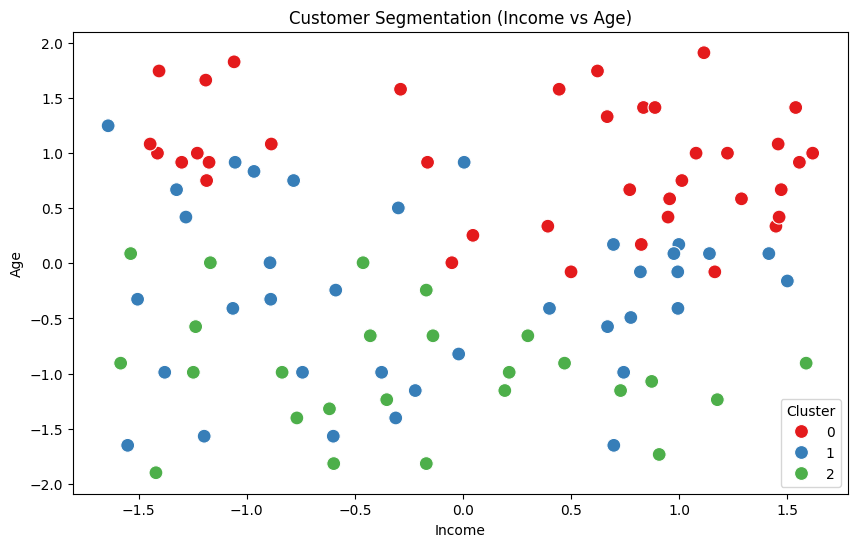

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Applying K-Means clustering with 3 clusters (as an example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Income', 'Age', 'Vehicle Preference', 'Location']])

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income', y='Age', hue='Cluster', palette='Set1', s=100, marker='o')
plt.title('Customer Segmentation (Income vs Age)')
plt.show()


**Step 3: Choosing the Optimal Number of Clusters**

We can use the Elbow Method or Silhouette Score to choose the optimal number of clusters.

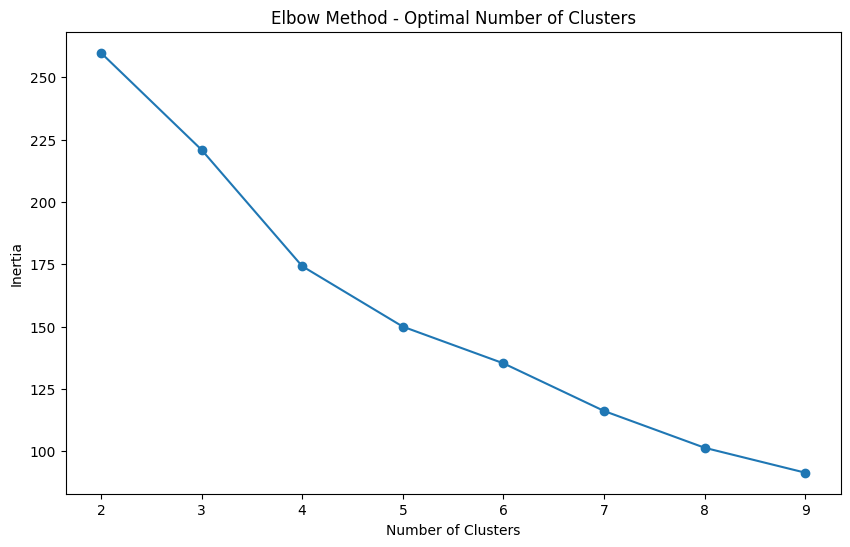

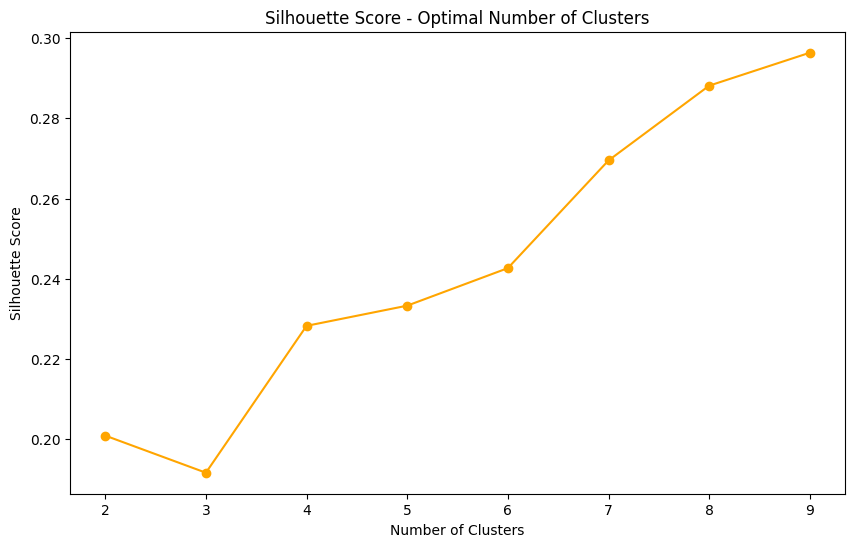

In [16]:
from sklearn.metrics import silhouette_score

# Elbow method to find the optimal number of clusters
inertia = []
sil_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['Income', 'Age', 'Vehicle Preference', 'Location']])
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df[['Income', 'Age', 'Vehicle Preference', 'Location']], kmeans.labels_))

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plotting the silhouette score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), sil_scores, marker='o', color='orange')
plt.title('Silhouette Score - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


**Step 4: Profile the Segments**

After clustering, we can describe each segment (cluster) based on the average values of features like Income, Age, Vehicle Preference, and Location.

In [17]:
# Profile each segment based on the average feature values
segment_profiles = df.groupby('Cluster').agg({
    'Income': 'mean',
    'Age': 'mean',
    'Vehicle Preference': 'mean',
    'Location': 'mean'
}).reset_index()

# Display the segment profiles
segment_profiles


,Cluster,Income,Age,Vehicle Preference,Location
0,0,0.330387,0.927966,1.394737,1.105263
1,1,-0.169682,-0.299096,0.027027,1.270270
2,2,-0.251059,-0.967847,1.520000,1.200000


# **Model Building and prediction**


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Sample Data (Replace with actual data)
data = {
    'City': ['Delhi', 'Bengaluru', 'Mumbai', 'Pune', 'Chennai'],
    'Pollution Level': [300, 150, 200, 100, 120],  # Higher values = worse pollution
    'Population Density': [11000, 8000, 20000, 5000, 6000],  # People per square km
    'Government Incentives': [80, 60, 70, 50, 60],  # Scale 0-100
    'Charging Infrastructure': [60, 45, 50, 40, 30],  # Charging stations per 1000 people
    'Income Level': [75000, 65000, 85000, 60000, 70000],  # Income in ₹
    'EV Adoption Suitability': [90, 70, 80, 65, 60]  # Target variable (suitability score 0-100)
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Feature Selection (independent variables)
X = df[['Pollution Level', 'Population Density', 'Government Incentives', 'Charging Infrastructure', 'Income Level']]

# Target variable (dependent variable)
y = df['EV Adoption Suitability']

# Data Preprocessing
# Standardizing numerical values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Building the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Predicting Suitability Scores for all cities
df['Predicted Suitability'] = model.predict(scaler.transform(X))

# Display the predicted suitability scores for each city
print("\nPredicted EV Market Suitability for Cities:")
print(df[['City', 'Predicted Suitability']])

# Sorting cities by predicted suitability score
df_sorted = df.sort_values(by='Predicted Suitability', ascending=False)
print("\nCities Ranked by EV Market Suitability:")
print(df_sorted[['City', 'Predicted Suitability']])


Root Mean Squared Error: 3.799999999999997

Predicted EV Market Suitability for Cities:
        City  Predicted Suitability
0      Delhi                  84.10
1  Bengaluru                  66.20
2     Mumbai                  78.75
3       Pune                  64.75
4    Chennai                  64.30

Cities Ranked by EV Market Suitability:
        City  Predicted Suitability
0      Delhi                  84.10
2     Mumbai                  78.75
1  Bengaluru                  66.20
3       Pune                  64.75
4    Chennai                  64.30
